In [3]:
import rasterio
import numpy as np
import subprocess
import os

def calcular_ndvi(b4_file, b5_file, output_file):
    b4 = rasterio.open(b4_file).read(1)
    b5 = rasterio.open(b5_file).read(1)

    red = b4.astype('float64')
    nir = b5.astype('float64')

    ndvi=np.where(
        (nir+red)==0., #It will return 0 for No Data value
        0, 
        (nir-red)/(nir+red))


    b4data = rasterio.open(b4_file)
    ndviTiff = rasterio.open(output_file,'w',driver='Gtiff',
                            width = b4data.width, 
                            height = b4data.height, 
                            count=1, crs=b4data.crs, 
                            transform=b4data.transform, 
                            dtype='float64')
    ndviTiff.write(ndvi,1)
    ndviTiff.close()

In [4]:
carpeta_recortadas = "ImagenesRecortadas"
archivo_b4 = subprocess.run(f"ls {carpeta_recortadas}/*B4.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")
archivo_b5 = subprocess.run(f"ls {carpeta_recortadas}/*B5.TIF", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip("\n")

print("Archivo que termina en B4.TIF:", os.path.abspath(archivo_b4))
print("Archivo que termina en B5.TIF:", os.path.abspath(archivo_b5))

calcular_ndvi(os.path.abspath(archivo_b4), os.path.abspath(archivo_b5), f"{carpeta_recortadas}/ndvi.TIF")

Archivo que termina en B4.TIF: /home/justo/Documentos/4to año/TIC y Geomatica/TIF-Geomatica/ImagenesRecortadas/LC08_L2SP_227082_20171022_20200902_02_T1_SR_B4.TIF
Archivo que termina en B5.TIF: /home/justo/Documentos/4to año/TIC y Geomatica/TIF-Geomatica/ImagenesRecortadas/LC08_L2SP_227082_20171022_20200902_02_T1_SR_B5.TIF


AttributeError: 'Axes' object has no attribute '_axes_class'

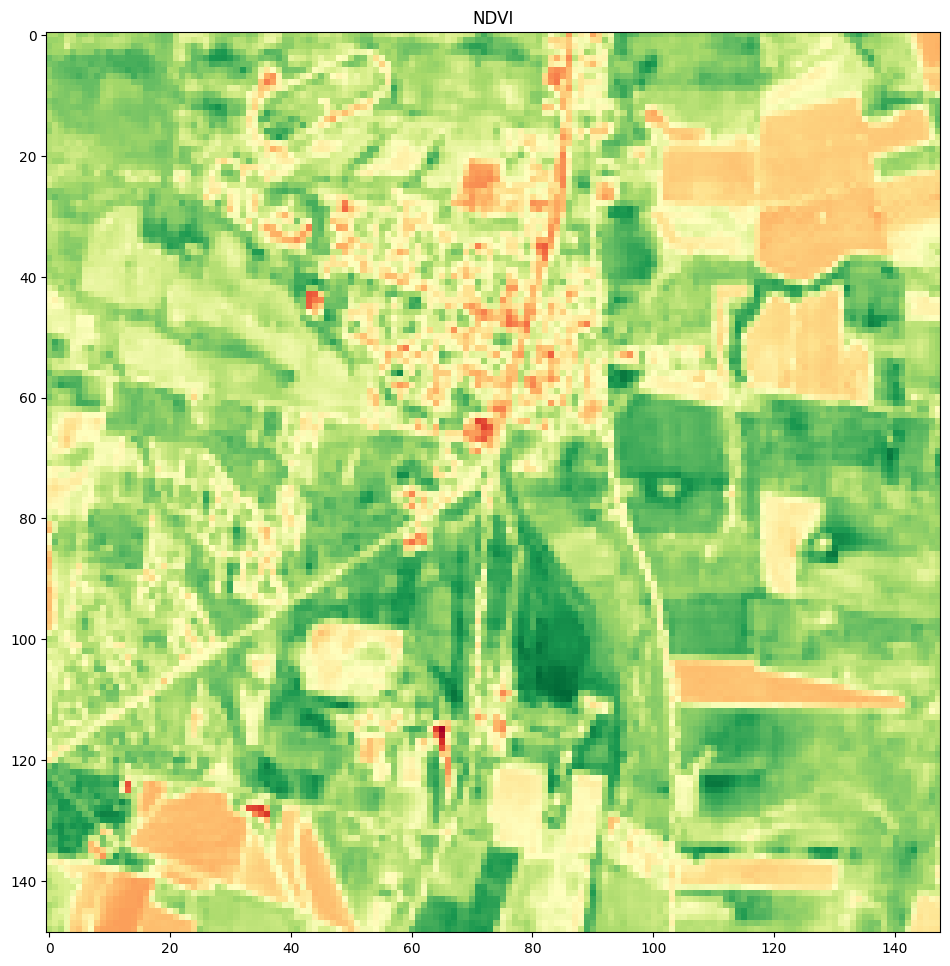

In [9]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt

ndviplot = rasterio.open(f'{carpeta_recortadas}/ndvi.TIF').read(1)
ep.plot_bands(ndviplot,
              cmap='RdYlGn',
              title="NDVI")
plt.show()